In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import random
import pickle
import json
import warnings
import time
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
warnings.filterwarnings('ignore')



In [70]:
g_or_v = "Growth"

path = r'C:\Users\Dani\OneDrive - Wirtschaftsuniversität Wien - IT-SERVICES\Dokumente\WU\Bachelorarbeit\02 Code\07 Performance Evaluation'

with open(f'{path}\DBSCAN_minpts_{g_or_v}_cluster_output_robust_all_quarters.pkl', 'rb') as f:
    data = pickle.load(f)

In [20]:
data['2022Q4'][10].to_clipboard()

In [80]:
### VISUALIZATION FUNCTION

def cluster_vis(cluster_dict, quarter, industry, dimensions, title):
    data_quarter_df = cluster_dict[quarter]
    
    ind_list = []

    for ind in data_quarter_df.keys():
        ind_list.append(data_quarter_df[ind]['Industry_Group_orig'].unique())
    
    ind_ind = list(data_quarter_df.keys())[ind_list.index(industry)]
    #print(ind_ind)
    data_ind_df = data_quarter_df[ind_ind]

    print(f'Industry Groups existing in quarter {quarter}:')
    print(list(ind_list))

    print(f'Clusters detected for industry {industry}:')
    print(data_ind_df['Industry Cluster'].value_counts())

    # factorize cluster labels for plotting
    #labels_int, _ = pd.factorize(data_ind_df['Industry Cluster'])
    labels_int = data_ind_df['Industry Cluster'].map({'16.0': 0, '16.-1': -1})
    #labels_int = data_ind_df['Industry Cluster'].map({'24.-1': -1})

    x_label = dimensions[0]
    y_label = dimensions[1]
    z_label = dimensions[2]
    
    fig = plt.figure(figsize=(6,6))
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)

    # get colormap from seaborn
    cmap = ListedColormap(sns.color_palette("crest", 256).as_hex())

    # plot
    sc = ax.scatter(data_ind_df[x_label], data_ind_df[y_label], data_ind_df[z_label], s=40, c=labels_int, marker='o', cmap=cmap, alpha=1)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)

    plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
    plt.title(title)
    return plt.show()

Industry Groups existing in quarter 2022Q4:
[array(['Financial Services'], dtype=object), array(['Materials'], dtype=object), array(['Semiconductors and Semiconductor Equipment'], dtype=object), array(['Utilities'], dtype=object), array(['Consumer Staples Distribution and Retail'], dtype=object), array(['Capital Goods'], dtype=object), array(['Food, Beverage and Tobacco'], dtype=object), array(['Technology Hardware and Equipment'], dtype=object), array(['Consumer Durables and Apparel'], dtype=object), array(['Health Care Equipment and Services'], dtype=object), array(['Insurance'], dtype=object), array(['Consumer Services'], dtype=object), array(['Household and Personal Products'], dtype=object), array(['Automobiles and Components'], dtype=object), array(['Commercial and Professional Services'], dtype=object), array(['Media and Entertaient'], dtype=object), array(['Energy'], dtype=object), array(['Consumer Discretionary Distribution and Retail'], dtype=object), array(['Transportation']

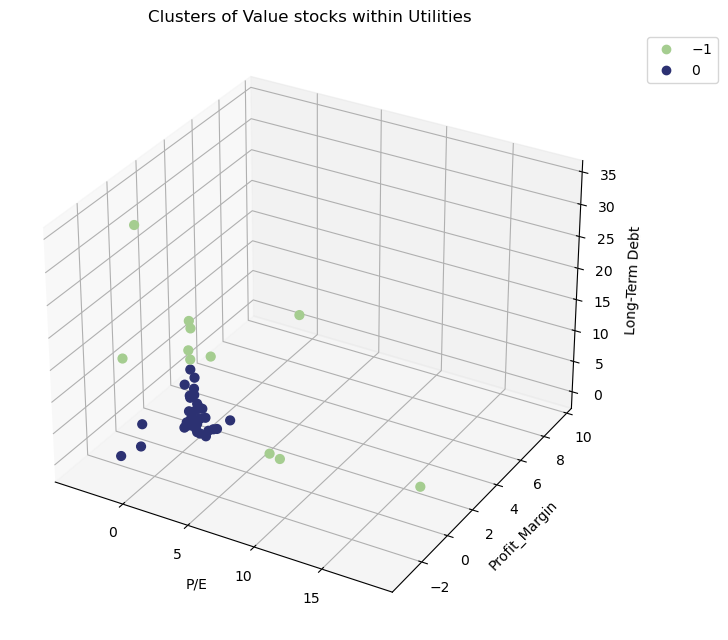

In [62]:
title = 'Clusters of Value stocks within Utilities'

columns_to_cluster_v = ['P/E', 'P/B', 'Div_Yield', 'Cash/Assets', 'Profit_Margin', 'Long-Term Debt']
columns_to_cluster_g = ['P/E', 'Rev_1y_Growth', 'ROE', 'Beta', 'Leverage', 'Invested Capital']

cluster_vis(data, '2022Q4', 'Utilities', ['P/E', 'Profit_Margin', 'Long-Term Debt'], title)

Industry Groups existing in quarter 2017Q2:
[array(['Semiconductors and Semiconductor Equipment'], dtype=object), array(['Transportation'], dtype=object), array(['Materials'], dtype=object), array(['Commercial and Professional Services'], dtype=object), array(['Consumer Durables and Apparel'], dtype=object), array(['Health Care Equipment and Services'], dtype=object), array(['Food, Beverage and Tobacco'], dtype=object), array(['Capital Goods'], dtype=object), array(['Software and Services'], dtype=object), array(['Technology Hardware and Equipment'], dtype=object), array(['Financial Services'], dtype=object), array(['Consumer Services'], dtype=object), array(['Automobiles and Components'], dtype=object), array(['Pharmaceuticals, Biotechnology and Life Sciences'], dtype=object), array(['Utilities'], dtype=object), array(['Consumer Discretionary Distribution and Retail'], dtype=object), array(['Real Estate Management and Development'], dtype=object), array(['Household and Personal Produc

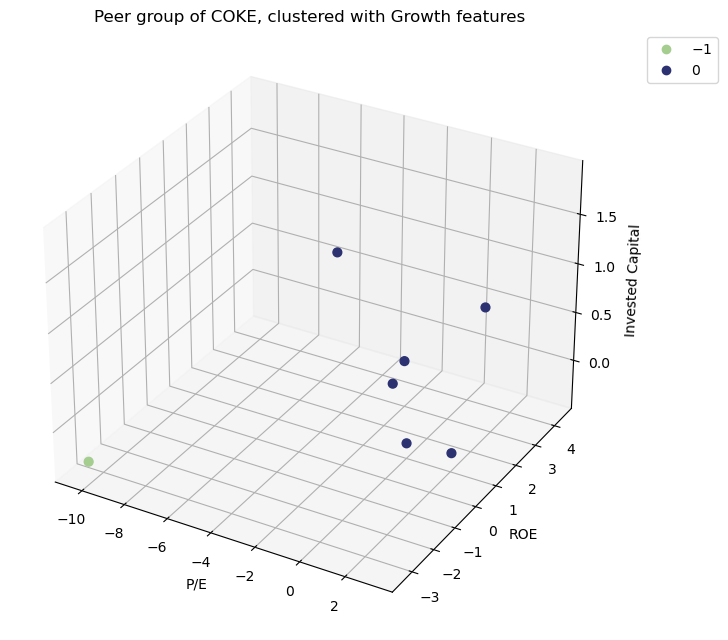

In [83]:
title = 'Peer group of COKE, clustered with Growth features'

columns_to_cluster_v = ['P/E', 'P/B', 'Div_Yield', 'Cash/Assets', 'Profit_Margin', 'Long-Term Debt']
columns_to_cluster_g = ['P/E', 'Rev_1y_Growth', 'ROE', 'Beta', 'Leverage', 'Invested Capital']

cluster_vis(data, '2017Q2', 'Food, Beverage and Tobacco', ['P/E', 'ROE', 'Invested Capital'], title)

Industry Groups existing in quarter 2017Q2:
[array(['Semiconductors and Semiconductor Equipment'], dtype=object), array(['Transportation'], dtype=object), array(['Materials'], dtype=object), array(['Commercial and Professional Services'], dtype=object), array(['Consumer Durables and Apparel'], dtype=object), array(['Health Care Equipment and Services'], dtype=object), array(['Food, Beverage and Tobacco'], dtype=object), array(['Capital Goods'], dtype=object), array(['Software and Services'], dtype=object), array(['Technology Hardware and Equipment'], dtype=object), array(['Financial Services'], dtype=object), array(['Consumer Services'], dtype=object), array(['Automobiles and Components'], dtype=object), array(['Pharmaceuticals, Biotechnology and Life Sciences'], dtype=object), array(['Utilities'], dtype=object), array(['Consumer Discretionary Distribution and Retail'], dtype=object), array(['Real Estate Management and Development'], dtype=object), array(['Household and Personal Produc

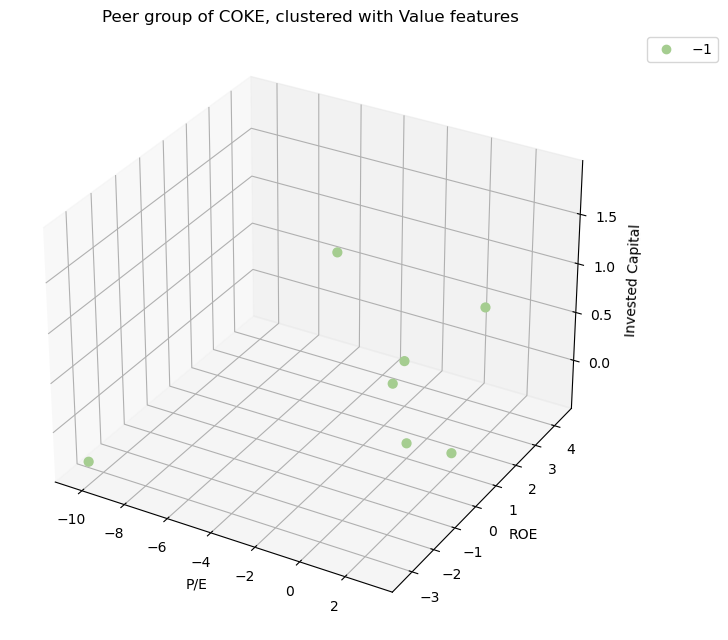

In [84]:
title = 'Peer group of COKE, clustered with Value features'

with open(f'{path}\DBSCAN_minpts_{g_or_v}_value_features_cluster_output_robust_all_quarters.pkl', 'rb') as f:
    data_g_v = pickle.load(f)

columns_to_cluster_v = ['P/E', 'P/B', 'Div_Yield', 'Cash/Assets', 'Profit_Margin', 'Long-Term Debt']
columns_to_cluster_g = ['P/E', 'Rev_1y_Growth', 'ROE', 'Beta', 'Leverage', 'Invested Capital']

cluster_vis(data_g_v, '2017Q2', 'Food, Beverage and Tobacco', ['P/E', 'ROE', 'Invested Capital'], title)

Industry Groups existing in quarter 2022Q2:
[array(['Semiconductors and Semiconductor Equipment'], dtype=object), array(['Transportation'], dtype=object), array(['Materials'], dtype=object), array(['Commercial and Professional Services'], dtype=object), array(['Consumer Durables and Apparel'], dtype=object), array(['Health Care Equipment and Services'], dtype=object), array(['Food, Beverage and Tobacco'], dtype=object), array(['Capital Goods'], dtype=object), array(['Software and Services'], dtype=object), array(['Technology Hardware and Equipment'], dtype=object), array(['Financial Services'], dtype=object), array(['Consumer Services'], dtype=object), array(['Automobiles and Components'], dtype=object), array(['Pharmaceuticals, Biotechnology and Life Sciences'], dtype=object), array(['Utilities'], dtype=object), array(['Consumer Discretionary Distribution and Retail'], dtype=object), array(['Energy'], dtype=object), array(['Real Estate Management and Development'], dtype=object), arra

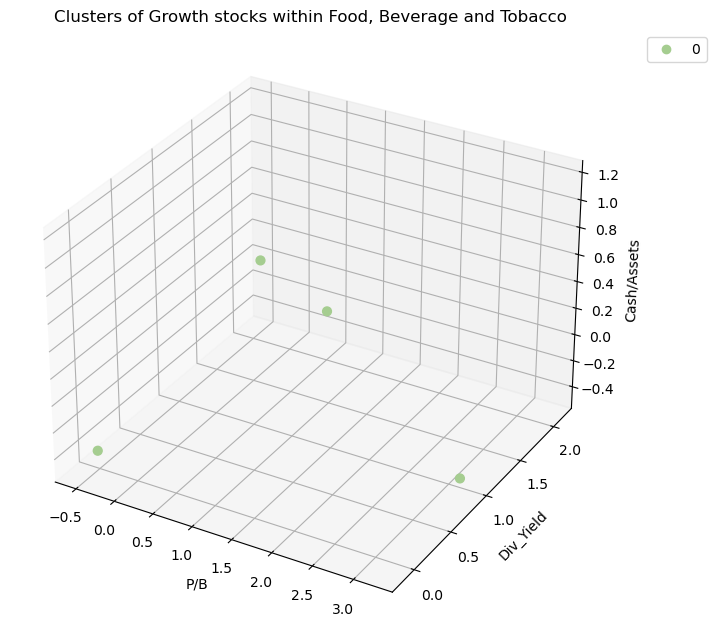

In [74]:
cluster_vis(data, '2022Q2', 'Utilities', ['P/B', 'Div_Yield', 'Cash/Assets'], title)

14
Industry Groups existing in quarter 2022Q4:
[array(['Semiconductors and Semiconductor Equipment'], dtype=object), array(['Transportation'], dtype=object), array(['Materials'], dtype=object), array(['Commercial and Professional Services'], dtype=object), array(['Consumer Durables and Apparel'], dtype=object), array(['Health Care Equipment and Services'], dtype=object), array(['Food, Beverage and Tobacco'], dtype=object), array(['Capital Goods'], dtype=object), array(['Software and Services'], dtype=object), array(['Technology Hardware and Equipment'], dtype=object), array(['Financial Services'], dtype=object), array(['Consumer Services'], dtype=object), array(['Automobiles and Components'], dtype=object), array(['Pharmaceuticals, Biotechnology and Life Sciences'], dtype=object), array(['Utilities'], dtype=object), array(['Consumer Discretionary Distribution and Retail'], dtype=object), array(['Energy'], dtype=object), array(['Real Estate Management and Development'], dtype=object), a

ValueError: zero-size array to reduction operation minimum which has no identity

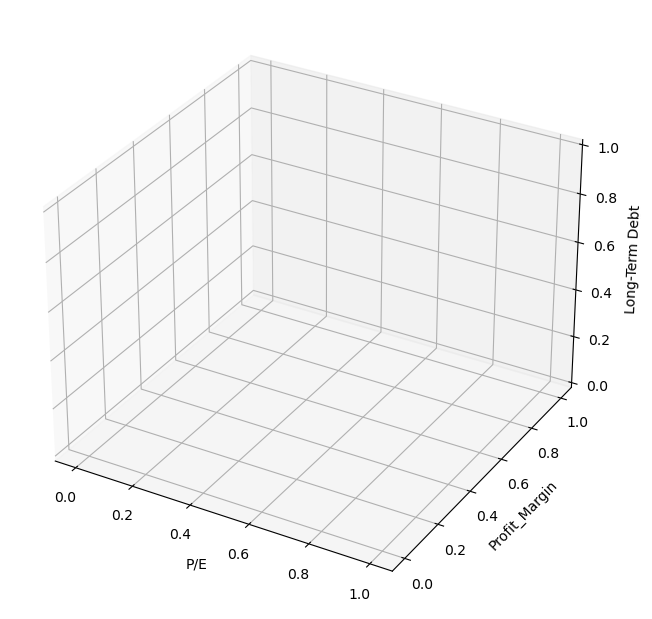

In [58]:
#minpts optimization

g_or_v = "Growth"

path = r'C:\Users\Dani\OneDrive - Wirtschaftsuniversität Wien - IT-SERVICES\Dokumente\WU\Bachelorarbeit\02 Code\07 Performance Evaluation'

with open(f'{path}\DBSCAN_minpts_{g_or_v}_cluster_output_robust_all_quarters.pkl', 'rb') as f:
    data_minpts = pickle.load(f)

title = 'Clusters of Growth stocks within Utilities'

columns_to_cluster_v = ['P/E', 'P/B', 'Div_Yield', 'Cash/Assets', 'Profit_Margin', 'Long-Term Debt']
columns_to_cluster_g = ['P/E', 'Rev_1y_Growth', 'ROE', 'Beta', 'Leverage', 'Invested Capital']

cluster_vis(data_minpts, '2022Q4', 'Food, Beverage and Tobacco', ['P/E', 'Profit_Margin', 'Long-Term Debt'], title)

24
Industry Groups existing in quarter 2022Q4:
[array(['Semiconductors and Semiconductor Equipment'], dtype=object), array(['Transportation'], dtype=object), array(['Materials'], dtype=object), array(['Commercial and Professional Services'], dtype=object), array(['Consumer Durables and Apparel'], dtype=object), array(['Health Care Equipment and Services'], dtype=object), array(['Food, Beverage and Tobacco'], dtype=object), array(['Capital Goods'], dtype=object), array(['Software and Services'], dtype=object), array(['Technology Hardware and Equipment'], dtype=object), array(['Financial Services'], dtype=object), array(['Consumer Services'], dtype=object), array(['Automobiles and Components'], dtype=object), array(['Pharmaceuticals, Biotechnology and Life Sciences'], dtype=object), array(['Utilities'], dtype=object), array(['Consumer Discretionary Distribution and Retail'], dtype=object), array(['Energy'], dtype=object), array(['Real Estate Management and Development'], dtype=object), a

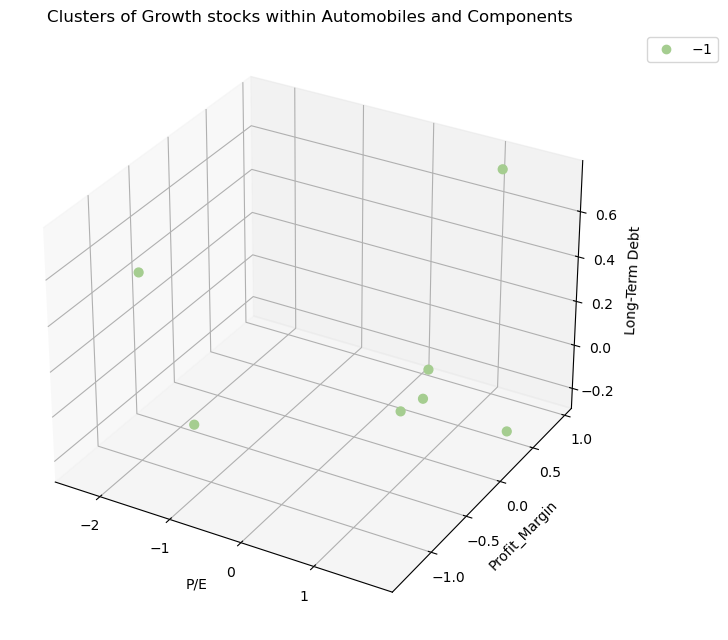

In [57]:
#example for outlier detection capability of DBSCAN

g_or_v = "Growth"

path = r'C:\Users\Dani\OneDrive - Wirtschaftsuniversität Wien - IT-SERVICES\Dokumente\WU\Bachelorarbeit\02 Code\07 Performance Evaluation'

with open(f'{path}\DBSCAN_minpts_{g_or_v}_cluster_output_robust_all_quarters.pkl', 'rb') as f:
    data_minpts = pickle.load(f)

title = 'Clusters of Growth stocks within Automobiles and Components'

columns_to_cluster_v = ['P/E', 'P/B', 'Div_Yield', 'Cash/Assets', 'Profit_Margin', 'Long-Term Debt']
columns_to_cluster_g = ['P/E', 'Rev_1y_Growth', 'ROE', 'Beta', 'Leverage', 'Invested Capital']

cluster_vis(data_minpts, '2022Q4', 'Automobiles and Components', ['P/E', 'Profit_Margin', 'Long-Term Debt'], title)